### DATASET ANALYSIS

In [2]:
import pandas as pd
from PIL import Image

In [3]:
dataset_metadata = pd.read_csv("../dataset/dataset_scenario_1.csv")

In [4]:
dataset_metadata.head()

,user_id,study_id,study_description,modalities,series_id,file_url,report_id,field_value
0,d47b9514-e506-4841-a1c3-bab02169aeb7,000011e3-6ac6-4cd0-8951-571cb8b66eb4,RX DE TÓRAX POSTERO-ANTERIOR,CR,6f60c6c4-0812-45db-83b0-78e39c83fee6,images/6f60c6c4-0812-45db-83b0-78e39c83fee6.dcm,999f4d20-2034-4710-89a2-3bf4cfb1646e,"<p class=""MsoNormal"" style=""text-align: justif..."
1,d47b9514-e506-4841-a1c3-bab02169aeb7,00031808-2cbc-4129-95cd-8bcbbe2262d9,RX DE TÓRAX POSTERO-ANTERIOR,CR,cf05b1fe-5d0a-459d-97e0-732baa1f6fab,images/cf05b1fe-5d0a-459d-97e0-732baa1f6fab.dcm,45c06951-27f8-4087-ae60-6b0788fc13c5,"<p class=""MsoNormal""><span style=""font-size: 9..."
2,d47b9514-e506-4841-a1c3-bab02169aeb7,00056c72-882f-4cd9-a581-2e34fb5d7fa1,CR RX DE TORAX OSEO 2 PROYECCIONES,DX,dfb83be6-ef85-4785-8983-872b9dc23bd1,images/dfb83be6-ef85-4785-8983-872b9dc23bd1.dcm,f9633a21-31fb-4f27-be93-fb1a0985b564,"<p class=""MsoNormal"" style=""text-align: justif..."
3,d47b9514-e506-4841-a1c3-bab02169aeb7,00074989-d9e4-4c04-97ef-9613ffeccfd6,CR RX DE TÓRAX POSTERO-ANTERIOR,CR,23994ced-3803-4c86-9456-2f3ed866bba7,images/23994ced-3803-4c86-9456-2f3ed866bba7.dcm,902d26ed-1f80-4a0e-affe-7f6fe16c59c9,"<p class=""MsoNormal"" style=""text-align: justif..."
4,d47b9514-e506-4841-a1c3-bab02169aeb7,00084bd7-52e9-4636-b4b3-9d6d530f78e0,RX DE TÓRAX POSTERO-ANTERIOR,CR,abda7cf1-7270-410a-8f93-4c14e019c23b,images/abda7cf1-7270-410a-8f93-4c14e019c23b.dcm,d121c6ea-945e-433e-b07c-70fcec1692e6,"<p class=""MsoNormal"" style=""text-align: justif..."


In [5]:
# Field value in html format, better make it prettier
dataset_metadata.loc[1, "field_value"]

'<p class="MsoNormal"><span style="font-size: 9pt;">Los tejidos blandos se observan de características normales, no se detectan imágenes focalizadas de lesión en forma aparente.</span></p>\n<br/>\n<p class="MsoNormal" style="text-align: justify;"><span style="font-size: 9pt;">Las estructuras óseas presentan densidad disminuida y morfología con cambios secundarios de osteoartrosis, con datos de actitud escoliótica <span style="mso-spacerun: yes;">\xa0\xa0</span>dorsal de convexidad a la derecha.</span></p>\n<br/>\n<p class="MsoNormal" style="text-align: justify;"><span style="font-size: 9pt;"><span style="mso-spacerun: yes;">\xa0</span>Los hemidiafragmas se encuentran de morfología general normal, con sus senos cardiofrénicos y costodiafragmáticos conservados.</span></p>\n<br/>\n<p class="MsoNormal" style="text-align: justify;"><span style="font-size: 9pt;">La tráquea es central y el mediastino es de morfología y dimensiones normales, las pleuras no presentan datos aparentes de lesión.<

In [6]:
# Se remueve los tags html (se asume no son necesarios aunque podrian tener valor cosas como enfasis en negritas cursivas etc)

from src.utils.html_handling import clean_html
dataset_metadata["cleaned_text"] = dataset_metadata["field_value"].apply(clean_html)
dataset_metadata["cleaned_text"].iloc[2]

'Los tejidos blandos se observan de características normales.\nLas estructuras óseas presentan densidad severamente disminuida y morfología general conservada. No se detectan imágenes de tipo postraumático que sugieran la presencia de trazo de fractura y no existen datos de desplazamientos óseos que sugieran luxación, se observan datos de osificación de los cartílagos distales de los arcos costales flotantes.\nLos hemidiafragmas se encuentran de morfología general normal, de aspecto regular, con sus senos cardiofrénicos y costodiafragmáticos libres, no se detectan imágenes que sean sugestivas de derrame pleural o neumotórax, como complicaciones traumáticas de mayor frecuencia.\nNo se encuentran imágenes de infiltrados a nivel pulmonar que sugieran imágenes hemorrágicas o lesiones del parénquima.\nIMPRESIÓN DIAGNÓSTICA:\nEstudio radiológico dentro de los límites de la normalidad, no se detectan imágenes de lesión ósea traumática reciente\nSe observa osificación de los cartílagos costale

In [6]:
from unidecode import unidecode
# Se observa que el string se divide en dos etapas, primer string y luego impresion diagnostica.
# Por curiosidad se verifica si todos tienen esta impresion diagnostica
dataset_metadata["has_impresion_diagnostica"] = dataset_metadata["cleaned_text"].apply(lambda x: "IMPRESIÓN DIAGNÓSTICA" in x)
dataset_metadata["has_impresion_diagnostica"].value_counts()

has_impresion_diagnostica
True    19
Name: count, dtype: int64

In [9]:
dataset_metadata["nb_words_first_section"] = dataset_metadata["cleaned_text"].apply(lambda x: len(x.split("IMPRESIÓN DIAGNÓSTICA")[0].replace("\n", " ").split(" ")))
dataset_metadata["nb_words_second_section"] = dataset_metadata["cleaned_text"].apply(lambda x: len(x.split("IMPRESIÓN DIAGNÓSTICA")[1].replace("\n", " ").split(" ")))

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_style("whitegrid")

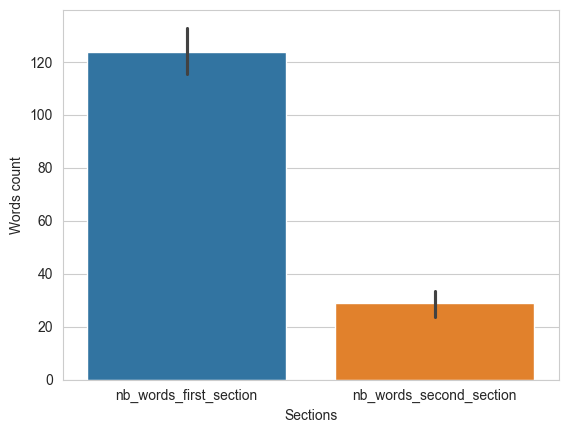

In [11]:
sbn.barplot(data=dataset_metadata[["nb_words_first_section", "nb_words_second_section"]])
plt.xlabel("Sections")
plt.ylabel("Words count");

Parece que la segunda parte de los textos tienen muchas menos palabras. Probablemente esa segunda parte sea un resumen mas conciso del diagnostico. 
Le voy a pegar a gemini con todos los textos y preguntar por un JSON que pueda definir bien la estructura de estos textos. De esta manera puedo buscar normalizar los diagnosticos y generar metricas objetivas invariantes a cambios de semantica en el fraseo de los diagnosticos.

In [18]:
dataset_metadata["study_description"].value_counts()

study_description
RX DE TÓRAX POSTERO-ANTERIOR                 10
CR RX DE TÓRAX POSTERO-ANTERIOR               5
CR RX DE TORAX OSEO 2 PROYECCIONES            1
RX DE HOMBRO UNA PROYECIÓN                    1
CR RX DE TÓRAX POSTERO-ANTERIOR Y LATERAL     1
Name: count, dtype: int64

Se observa la distribución de study descriptions, la mayoria son RX DE TÓRAX POSTERO-ANTERIOR 

### Propuesta de metricas de evaluación
Existen metricas de NLP que podrian usarse como proxy, entre ellas me imagino palabra a palabra (sentences exactos) y tecnicas como Bag Of Words que permitan saber que clusters de palabras son los mas comunes. Esta segunda partiria de tener un corpus grande de palabras medicas que describan Chest X-rays, el tema es que solo saber si palabras estan presentes puede ser misleading. Esto debido a que un simple "No se encuentra X" puede confundirse con un "Se encuentra X", invalidando totalmente la comparción.

Por ellos solo voy a estar utilizando dos métricas que permitan comparaciones semanticas y no necesariamente exactas. Particularmente utilizadno LLMs como juez de comparación de algun u otra manera

## Metrica 1 - Diagnostic JSON normalization
La idea de esta metrica es tener un JSON universal que permita describir las caracteristicas de un diagnostico. De esta manera si para cualquier texto de diagnostico puedo generar este JSON, pudiese comparar key a key dos diagnosticos "diferentes" y determinar la similaridad. De esta manera tambien pudiese utilizar un experto para que pondere cada key del JSON y tener un metrica laxa. Esto para que por ejemplo, si no es tan relevante para la comparación el (e.g) volumen de flema, pueda permitir diferencias en esta direccion y poder categorizarlo aun como verdadero positivo. Sin embargo, para este analisis vamos a asumir que todas las keys tienen la misma relevancia. Para esto se iteró desde gemini UI la generación del system instruction y puede ser encontrado en src.system_instructions.escenario1_baseline.system_instruction_text_json_normalizer

## Metrica 2 - Comparación text vs text con system instruction especializado
Esta metrica le comparte a la LLM ambos textos y utiliza un System Instruction que le hace saber el tipo de comparación semantica que tiene que hacer. El system instruction busca hacer enfasis en comparación medica semantica mas que palabra a palabra como mencionado anteriormente. Para esto se iteró desde gemini UI la generación del system instruction y puede ser encontrado en src.system_instructions.escenario1_baseline.system_instruction_text_to_text_comparison


In [14]:
## All clean text to generate system instruction for text generation given an image
for j, (i, case_row) in enumerate(dataset_metadata.iterrows()):
    print(f"{j+1}) : {case_row['cleaned_text']}")
    print()


1) : Los tejidos blandos se observan de características normales.
Las estructuras óseas presentan densidad disminuida y morfología con cambios secundarios de osteoartrosis, con datos de rotoescoliosis dorsal de convexidad a la derecha.
Los hemidiafragmas se encuentran de morfología general normal, de aspecto regular, con sus senos cardiofrénicos y costodiafragmáticos libres.
La tráquea es central y el mediastino es de morfología y dimensiones normales, las pleuras no presentan datos aparentes de lesión.
A nivel pulmonar se observa adecuada neumatización, de características normales, con adecuada distribución de las estructuras bronco-vasculares, no se detectan imágenes de infiltrados alveolares o intersticiales, que sugieran lesión focalizada.
El corazón muestra morfología y dimensiones normales, sin imágenes de crecimiento de cavidades, apreciando ambos hilios dentro de la normalidad.
IMPRESIÓN DIAGNÓSTICA:
Estudio radiológico que muestra estructuras pleuro-pulmonares y cardio-vascula

## Generación de reporte y metricas
Para generar los reportes y metricas se creó el script generate_reports_and_metrics.py. El cual toma como input la carpeta de imagenes, el csv de metadata, las metricas a calcular, el output csv path y la temperatura del modelo.

In [19]:
results_df = pd.read_csv("../dataset_generated_plus_comparison.csv")

# Metric 1 analysis

In [23]:
# Failed generations (are going to be excluded from analysis)
print("Number of failed generations")
print(results_df["metric1_json_result"].isna().sum())
results_df = results_df.loc[~results_df["metric1_json_result"].isna(), :].reset_index(drop=True)

Number of failed generations
1


In [24]:
# Sample result JSON
print(results_df["metric1_json_result"].iloc[0])

{
  "score": 75,
  "clinical_accuracy_status": "MINOR_ERROR",
  "missed_findings": [
    "Spondylosis/Osteoarthrosis",
    "Scoliosis (dorsal dextroscoliosis)"
  ],
  "hallucinations": [
    "Normal spine alignment"
  ],
  "reasoning": "The model correctly ruled out acute cardiopulmonary pathology (the primary clinical objective) but failed to extract the chronic bone findings (osteoarthrosis and scoliosis) present in the ground truth, incorrectly categorizing the exam as completely normal."
}


In [42]:
import json

results_df["metric1_clinical_accuracy"] = results_df["metric1_json_result"].apply(lambda x: json.loads(x)["clinical_accuracy_status"])
results_df["metric1_score"]= results_df["metric1_json_result"].apply(lambda x: json.loads(x)["score"])
results_df["missed_findings"]= results_df["metric1_json_result"].apply(lambda x: json.loads(x)["missed_findings"])
results_df["hallucinations"]= results_df["metric1_json_result"].apply(lambda x: json.loads(x)["hallucinations"])


In [26]:
results_df["metric1_clinical_accuracy"].value_counts()

metric1_clinical_accuracy
CRITICAL_ERROR    10
MINOR_ERROR        6
CORRECT            2
Name: count, dtype: int64

Usando esta metrica se observa que la generación tiene mayor probabilidad de generar errores criticos que correctos completos o errores menores. Puede ser el caso que errores criticos sean en el ground truth y no en la generación de texto dado el string. Para seria necesario realizar un forense utilizando varios expertos medicos que tomen una decision de cual generación esta mas completa / mejor.

## Veamos los missed findings y alucinaciones de los critical error
### Missing findings


In [40]:
missing_findings_flatten = [xx for x in results_df.loc[results_df["metric1_clinical_accuracy"] == "CRITICAL_ERROR", "missed_findings"].tolist() for xx in x]
pd.DataFrame(missing_findings_flatten).value_counts()

0                                                                                          
Osteophytes                                                                                    3
Scoliosis (dorsal dextroscoliosis)                                                             3
Spondylosis                                                                                    3
Widened mediastinum                                                                            3
COPD findings                                                                                  1
COPD signs (hyperinflation, flattened diaphragms)                                              1
Vascular cephalization (Edema)                                                                 1
Tracheal deviation                                                                             1
Spondylosis / Osteoarthrosis                                                                   1
Bilateral pulmonary calcifications 

Se puede observar que el modelo le esta faltando en un rango importante de diagnosticos, no es unicamente en un set de palabras. Distintos tipos de Scoliosis pareciera ser un patron pero poco pronunciado.

In [45]:
results_df['metric1_length_missing_findings'] = results_df["missed_findings"].apply(len)
results_df['metric1_length_missing_findings'].value_counts()

metric1_length_missing_findings
3    9
0    4
1    2
2    1
6    1
5    1
Name: count, dtype: int64

Cuatro de las criticas no tuvieron missing finding por lo que seguro fue falla por alucinaciones

### Alucinaciones

In [43]:
hallucinations_flatten = [xx for x in results_df.loc[results_df["metric1_clinical_accuracy"] == "CRITICAL_ERROR", "hallucinations"].tolist() for xx in x]
pd.DataFrame(hallucinations_flatten).value_counts()

0                                                                    
Mild cardiomegaly                                                        2
Aortic atheromatosis / calcified aorta                                   1
Aortic calcification                                                     1
Aortic elongation                                                        1
Bilateral calcified pleural plaques (suggestive of asbestos exposure)    1
Degenerative changes (spondylosis, osteophytes)                          1
Impression category: normal (Ground Truth was abnormal_acute)            1
Mediastinal widening                                                     1
Osteopenia                                                               1
Residual right hilar calcifications                                      1
Scoliosis (mild right-convexity)                                         1
Spine alignment reported as normal                                       1
Surgical clips in right upper 

De manera similar no se observa ningun patrón en las alucinaciones. Pareciera estar alucinando en un rango variado de diagnosticos

In [46]:
results_df['metric1_length_hallucinations'] = results_df["hallucinations"].apply(len)
results_df['metric1_length_hallucinations'].value_counts()

metric1_length_hallucinations
0    9
1    4
2    3
4    1
3    1
Name: count, dtype: int64

Los errores se presentan mas por la falta de información que por alucinaciones, esto se debe a que la mitad de los critical errores no tienen alucinaciones

<Axes: xlabel='metric1_score'>

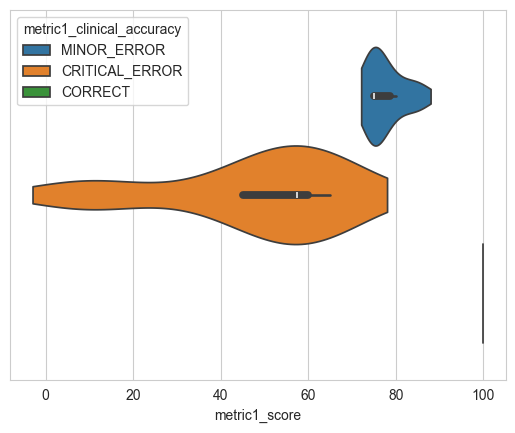

In [49]:
## Score distribution
sbn.violinplot(results_df, x="metric1_score", hue="metric1_clinical_accuracy", cut=True)

# Metric 2 analysis

In [50]:
# Failed generations (are going to be excluded from analysis) [zero because already excluded]
print("Number of failed generations")
print(results_df["metric2_json_result"].isna().sum())
results_df = results_df.loc[~results_df["metric2_json_result"].isna(), :].reset_index(drop=True)

Number of failed generations
0


In [55]:
# Sample result JSON
print(results_df["metric2_json_result"].iloc[10])

```json
{
  "score": 10,
  "clinical_accuracy_status": "CRITICAL_ERROR",
  "missed_findings": [
    "Apertura de los espacios intercostales",
    "Escoliosis dorsal de convexidad a la derecha",
    "Hemidiafragmas abatidos",
    "Sobredistensión pulmonar",
    "Aumento basal de la trama vascular",
    "Cefalización del flujo",
    "Diagnóstico de probable proceso inflamatorio bronquial / Síndrome asmatiforme"
  ],
  "hallucinations": [
    "Columna dorsal alineada (contradice la escoliosis del GT)",
    "Hemidiafragmas de posición habitual (contradice el abatimiento del GT)",
    "Estructuras pleuro-pulmonares dentro de parámetros normales"
  ],
  "reasoning": "El reporte generado es peligroso ya que concluye un estudio 'normal' ignorando por completo los signos de atrapamiento aéreo (hiperinsuflación) y patología bronquial descritos en el original, contradiciendo hallazgos físicos específicos como la escoliosis y el abatimiento diafragmático."
}
```


In [57]:
import json

results_df["metric2_clinical_accuracy"] = results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["clinical_accuracy_status"])
results_df["metric2_score"]= results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["score"])
results_df["metric2_missed_findings"]= results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["missed_findings"])
results_df["metric2_hallucinations"]= results_df["metric2_json_result"].apply(lambda x: json.loads(x.replace("json","").replace("```", ""))["hallucinations"])


In [58]:
results_df["metric2_clinical_accuracy"].value_counts()

metric2_clinical_accuracy
CRITICAL_ERROR    16
CORRECT            2
Name: count, dtype: int64

Usando esta métrica vemos conclusiones similares a la metrica anterior. Muchos critical errors y pocos fully correct

<Axes: xlabel='metric2_score'>

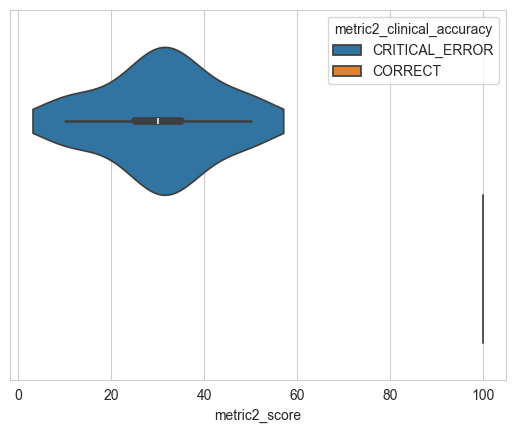

In [59]:
sbn.violinplot(results_df, x="metric2_score", hue="metric2_clinical_accuracy", cut=True)

### INDIVIDUAL CLASS AND METHODS TESTING

In [ ]:
from src.utils.gemini import GeminiClient
from src.utils.config import config
from PIL import Image

In [2]:
gemini = GeminiClient(config["GEMINI_API_KEY"])

In [3]:
image = Image.open('../dataset/images/074e96c8-a8a2-4413-aa9e-37a0a53fd4ab.jpg')

In [4]:
gemini.predict(image, "read the scan", "", 0)

'Based on the provided chest X-ray, here is a detailed reading:\n\n**Overall Impression:**\nThis is a normal chest radiograph. There are no acute cardiopulmonary abnormalities visible.\n\n**Detailed Findings:**\n\n*   **Image Quality:** This is a PA (Posteroanterior) view with good exposure and positioning. The patient is not rotated (the clavicles are equidistant from the spine), and the inspiration is adequate (enough ribs are visible).\n*   **Lungs:** Both lung fields are clear. There are no signs of consolidation (pneumonia), masses, nodules, or infiltrates. The vascular markings are normal.\n*   **Pleura:** The costophrenic angles (the sharp corners at the bottom of the lungs) are sharp and clear, indicating there is no pleural effusion (fluid accumulation). There is no evidence of pneumothorax (collapsed lung).\n*   **Heart and Mediastinum:** The heart size is normal (the cardiothoracic ratio is less than 50%). The mediastinal contours are normal, with the trachea appearing midli